<a href="https://colab.research.google.com/github/kchaitanya954/Machine-learning-technologies/blob/main/Task_2_Pasala_Krishna_Chaitanya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2
1. Develop yourself using numpy library: 
a) a function to implement stochastic gradient descent (SGD) algorithm 
b) Adam's optimization algorithm 
for a function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.


In [1]:
# Importing required libraries
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
%matplotlib inline


In [2]:
# Defining a convex function (z=x^2+y^2) and its gradient of two independent variables x and y
def fun(x,y):
  return x**2+y**2

def gradient(x,y):
  return np.array([2*x, 2*y])


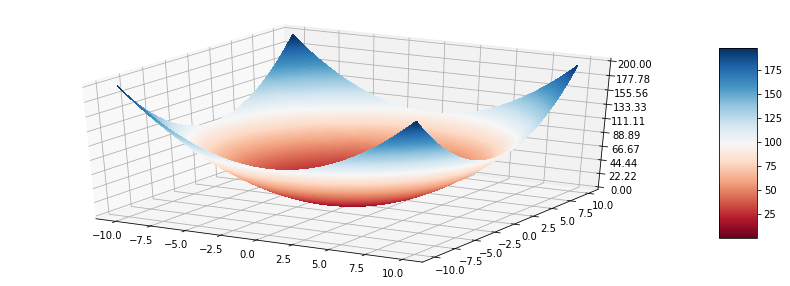

In [3]:
# ploting the function (z=x^2+y^2)
x1=np.arange(-10,10,0.1)
x2=np.arange(-10,10,0.1)
x=np.array([x1,x2])
X, Y= np.meshgrid(x1,x2)
Z=fun(X,Y)
fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [4]:
#stohastic gradient function (A greadient optimizer which finds the minima of a convex function using randomness)
def stohastic_gradient_decent(function,gradient,x_prev,learn_rate):
    '''
    gradiend: gradiendt of an objective function
    x_prev=intial assumption of minima point
    Returns:
    number of iterations, minimum of a function, minimum point, the path traveled to obtain minimum
    '''
    epsilon = 0.0001
    #iterations
    i= 1
    norm=[]
    seq_x = []
    seq_y = []
    x_next = np.subtract(x_prev, learn_rate*gradient(x_prev[0],x_prev[1]))
    #x_next[1] = np.subtract(x_prev[1], learn_rate*gradient(x_prev[0],x_prev[1])[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    norm=np.append(norm,np.linalg.norm(np.subtract(x_next,x_prev)))
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        #Randomozing the direction of axis of gradient
        #np.random.seed(1)
        if (np.random.randint(0,2)==0):
          x_prev[0] = x_next[0]
          x_next[0] = x_prev[0] - learn_rate*gradient(x_prev[0],x_prev[1])[0]
          
        else:
          x_prev[1] = x_next[1]
          x_next[1] = x_prev[1] - learn_rate*gradient(x_prev[0],x_prev[1])[1]
        
        i += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        norm=np.append(norm,np.linalg.norm(np.subtract(x_next,x_prev)))
    min_value=function(x_next[0],x_next[1])
    return ( x_next, i, seq_x,seq_y,min_value, norm)

Minimum (x,y) from stohastic gradient descent: [0. 0.]
Number of stohastic gradient descent iterations: 11
Minima of function 0.0


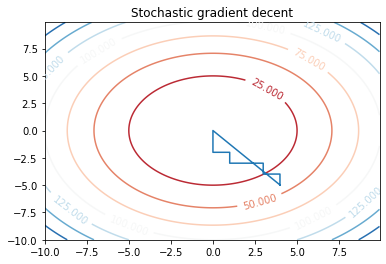

In [20]:
#intial value is randomly selected, learning rate is 0.002, with a threshold of 0.0001.
np.random.seed(4)
x_prev=np.random.randint(-10,10,2)
sgd_output = stohastic_gradient_decent(fun, gradient, x_prev, 0.002)

# the contour plot for the stohastic gradient decent.

x_data = []
y_data = []

fig, ax = plt.subplots()

line, = ax.plot(0, 0)
plt.figure(1)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Stochastic gradient decent')
def animation_frame(i):
	x_data.append(sgd_output[2][i])
	y_data.append(sgd_output[3][i])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line, 

anim = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(sgd_output[2]), 1), interval=300)
print('Minimum (x,y) from stohastic gradient descent: %s' %sgd_output[0])
print('Number of stohastic gradient descent iterations: %s' %sgd_output[1])
print('Minima of function {}'.format(sgd_output[4]))
HTML(anim.to_html5_video())


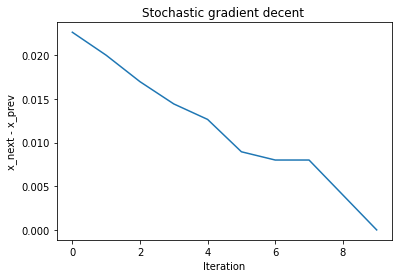

In [18]:
#plotting the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N for Stochastic gradient decent
norm=sgd_output[5][1:]
x_axis=np.arange(len(norm))
plt.title('Stochastic gradient decent ')
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.plot(x_axis, norm)
plt.show()

In [9]:
# adam optimization algorith for finding minimum of a function
def adam(function, gradient, x_init, alpha=0.02, beta1=0.9, beta2=0.999, eps=1e-8):
  '''
  gradient: gradient of a function
  x_init: intial assumtion of minima
  '''
  
  epsilon=0.0001
  #path of independent variables travelled to reach minima
  seq_x = []
  seq_y = []
  norm_adam=[]
  # initialize first and second moments to 0
  m = np.array([0,0])
  v = np.array([0,0])
  i=1
  g = gradient(x_init[0], x_init[1])
  m = beta1 * m + (1.0 - beta1) * g
  v = beta2 * v + (1.0 - beta2) * g**2
  mhat = np.divide(m , (1.0 - beta1**(i)))
  vhat =np.divide( v , (1.0 - beta2**(i)))
  x = np.subtract(x_init ,np.multiply(alpha , np.divide(mhat , (np.sqrt(vhat) + eps))))
  seq_x=np.append(seq_x, x[0])
  seq_y=np.append(seq_y, x[1])
  norm_adam=np.append(norm_adam ,np.linalg.norm(np.subtract(x,x_init)) )
  while np.linalg.norm(np.subtract(x,x_init)) > epsilon:
    x_init=x
    g = gradient(x_init[0], x_init[1])
    m = beta1 * m + (1.0 - beta1) * g
    v = beta2 * v + (1.0 - beta2) * g**2
    mhat = np.divide(m , (1.0 - beta1**(i)))
    vhat =np.divide( v , (1.0 - beta2**(i)))
    x = np.subtract(x_init ,np.multiply(alpha , np.divide(mhat , (np.sqrt(vhat) + eps))))
    i+=1

    seq_x = np.append(seq_x, x[0])
    seq_y = np.append(seq_y, x[1])
    norm_adam=np.append(norm_adam ,np.linalg.norm(np.subtract(x,x_init)) )

    # evaluate candidate point
    score = function(x[0], x[1])
    # keep track of solutions
    # report progress
  return ( x, i, seq_x,seq_y,score, norm_adam)

Minimum (x,y) from gradient descent: [ 0.00023049 -0.00669031]
Number of gradient descent iterations: 735
Minima of function 4.481341028541565e-05


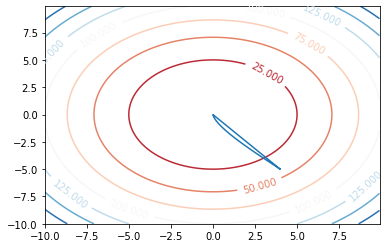

In [10]:
# define the intial input
np.random.seed(4)
x_init=np.random.randint(-10,10,2)

# intializing coefficents
alpha = 0.02
beta1 = 0.9
beta2 = 0.999
# perform the gradient descent search with adam
adam_output = adam(fun, gradient, x_init, alpha, beta1, beta2)

# plotting the path travelled to reach minima
x_data = []
y_data = []

fig, ax = plt.subplots()

line, = ax.plot(0, 0)
plt.figure(1)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.title('Adam Algorithm')
plt.clabel(CS, inline=1, fontsize=10)
def animation_frame(i):
	x_data.append(adam_output[2][i])
	y_data.append(adam_output[3][i])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line, 

anim = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(adam_output[2]), 1), interval=30)
print('Minimum (x,y) from gradient descent: %s' %adam_output[0])
print('Number of gradient descent iterations: %s' %adam_output[1])
print('Minima of function {}'.format(adam_output[4]))
HTML(anim.to_html5_video())

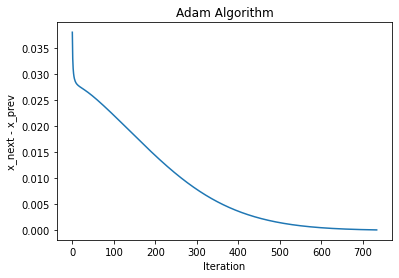

In [19]:
#plotting the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N for adam algorithm

norm_adam=adam_output[5][1:]
x_axis=np.arange(len(norm_adam))
plt.title('Adam Algorithm')
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.plot(x_axis, norm_adam)
plt.show()